In [1]:
import scipy.stats as sps
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


In [60]:
Y = np.array([1, 5, 2]).reshape(1, -1).T
PSI = np.array([[1, 0],
                [0, 1],
                [1, 1]])
sample = np.hstack((PSI, Y))

## a) Найти уравнение линейной регрессии $\omega=a\xi+\beta\eta$ 

In [61]:
F = PSI.T @ PSI
F_inv = np.linalg.inv(F)
betta_ = F_inv @ PSI.T @ Y
e = Y - PSI@beta_

print(f'omega = {np.round(betta_[0][0], 4)}*xi + {np.round(betta_[1][0], 4)}*eta')

omega = -0.3333*xi + 3.6667*eta


## б) Найти уравнение ridge регрессии, построить график CVSS и определить значение параметра регуляризации

CVSS_MIN =  21.265098622222343
lambda_0 =  1.5


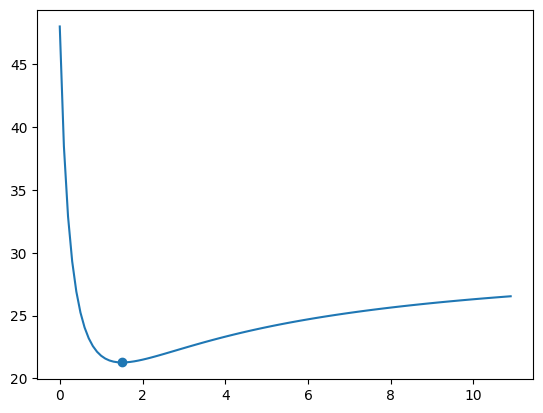

In [109]:
CVSS = []
lambda_ = np.arange(0, 11, 0.1)

CVSS_MIN = -1
lambda_0_ridge = 0

def L(betta, Y_new, Psi_new, lambda_i):
    e = np.ravel(Y_new.T - Psi_new @ betta)
    rss = e.T @ e
    return rss + lambda_i * np.sum(betta**2)

#ищем lambda_0 при котором достигается минимум L
for lambda_i in lambda_:
    
    CVSS_i = np.array([])
    for j in range(3):
        Y_new = np.vstack((Y[:j], Y[j+1:]))
        PSI_new = np.vstack((PSI[:j, :], PSI[j+1:, :]))
        
        solution = opt.minimize(L, x0=np.ravel(betta_), args = (Y_new, PSI_new, lambda_i)) #ищем cvss_j минимизируя L при фиксированном lambda за счёт betta
        CVSS_j = (np.dot(PSI[j].T, solution.x) - Y[j])**2
        CVSS_i = np.append(CVSS_i, CVSS_j)
        
    CVSS = np.append(CVSS, sum(CVSS_i))
    if (CVSS_MIN != -1 and sum(CVSS_i) < CVSS_MIN) or (CVSS_MIN == -1):
        CVSS_MIN = sum(CVSS_i)
        lambda_0_ridge = lambda_i
        
    
plt.plot(lambda_, CVSS)
plt.scatter(lambda_0_ridge, CVSS_MIN)
print("CVSS_MIN = ", CVSS_MIN)
print("lambda_0 = ", lambda_0_ridge)

In [113]:
#минимизируем L для полных данных (без поиска cvss) за счёт betta для фиксированного найденого lambda_0
def L(betta_, y_, Psi_, lambda_): 
    e = np.ravel(y_.T - Psi_ @ betta_)
    rss = e.T @ e
    return rss + lambda_ * np.sum(betta_**2)

solution_ridge = opt.minimize(L, x0  = np.ravel(betta_), args = (Y, PSI, lambda_0_ridge))
a_ridge = solution_ridge.x[0]
b_ridge = solution_ridge.x[1]

print("Уравнение линейной регрессии: ")
print("omega = ",  np.round(a_ridge, 3), "* ksi + ", np.round(b_ridge, 3), "* eta")



Уравнение линейной регрессии: 
omega =  0.311 * ksi +  1.911 * eta


## в) Найти уравнение lasso регрессии, построить график CVSS и определить значение параметра регуляризации

CVSS_MIN =  26.000000011583534
lambda_0 =  6.0


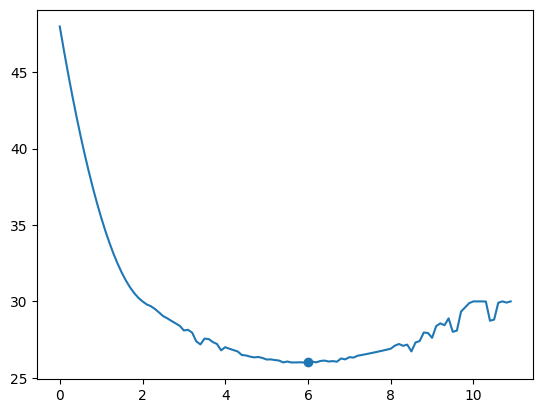

In [114]:
CVSS = []
lambda_ = np.arange(0, 11, 0.1)

CVSS_MIN = -1
lambda_0_lasso = 0

def L(betta, Y_new, Psi_new, lambda_i):
    e = np.ravel(Y_new.T - Psi_new @ betta)
    rss = e.T @ e
    return rss + lambda_i * np.sum(abs(betta))

#ищем lambda_0 при котором достигается минимум L
for lambda_i in lambda_:
    
    CVSS_i = np.array([])
    for j in range(3):
        Y_new = np.vstack((Y[:j], Y[j+1:]))
        PSI_new = np.vstack((PSI[:j, :], PSI[j+1:, :]))
        
        solution = opt.minimize(L, x0=np.ravel(betta_), args = (Y_new, PSI_new, lambda_i)) #ищем cvss_j минимизируя L при фиксированном lambda за счёт betta
        CVSS_j = (np.dot(PSI[j].T, solution.x) - Y[j])**2
        CVSS_i = np.append(CVSS_i, CVSS_j)
        
    CVSS = np.append(CVSS, sum(CVSS_i))
    if (CVSS_MIN != -1 and sum(CVSS_i) < CVSS_MIN) or (CVSS_MIN == -1):
        CVSS_MIN = sum(CVSS_i)
        lambda_0_lasso = lambda_i
        
    
plt.plot(lambda_, CVSS)
plt.scatter(lambda_0_lasso, CVSS_MIN)
print("CVSS_MIN = ", CVSS_MIN)
print("lambda_0 = ", lambda_0_lasso)

In [115]:
#минимизируем L для полных данных (без поиска cvss) за счёт betta для фиксированного найденого lambda_0
def L(betta_, y_, Psi_, lambda_): 
    e = np.ravel(y_.T - Psi_ @ betta_)
    rss = e.T @ e
    return rss + lambda_ * np.sum(abs(betta_))

solution_lasso = opt.minimize(L, x0  = np.ravel(betta_), args = (Y, PSI, lambda_0_lasso))
a_lasso = solution_lasso.x[0]
b_lasso = solution_lasso.x[1]

print("Уравнение линейной регрессии: ")
print("omega = ",  np.round(a_lasso, 3), "* ksi + ", np.round(b_lasso, 3), "* eta")

Уравнение линейной регрессии: 
omega =  -0.0 * ksi +  2.0 * eta
